# Polynomial Regression on Boston Housing Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

**Load the Boston Housing Dataset from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

bostonDataSet = load_boston()

#dir() function to understand the functionality
print(dir(bostonDataSet))                                         

['DESCR', 'data', 'feature_names', 'target']


In [3]:
# The description of all the features is given by DESCR.
print(bostonDataSet.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

**Load the data into pandas dataframe**

In [4]:
boston = pd.DataFrame(bostonDataSet.data, columns=bostonDataSet.feature_names)
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [5]:
boston['MEDV'] = bostonDataSet.target

**Data preprocessing**

In [6]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Correlation matrix**

In [7]:
# check for highest feature correlation with the target variable
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**Observations**

**From the above correlation table, we can see that MEDV has a strong positive correlation with RM and strong negative correlation with LSTAT**

**Data Visualization**

Text(0.5,1,'Linearity Graph between RM and MEDV')

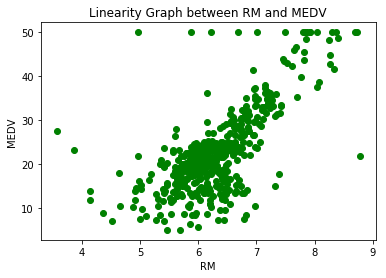

In [8]:
plt.scatter(boston.RM,boston.MEDV,color = "green")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Linearity Graph between RM and MEDV")

Text(0.5,1,'Linearity between RM and MEDV')

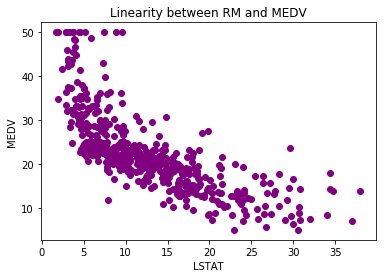

In [9]:
plt.scatter(boston.LSTAT,boston.MEDV,color = "purple")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("Linearity between RM and MEDV")

**Prepare the data for sampling**

In [10]:
X = boston[["RM","LSTAT"]]
Y = boston[["MEDV"]]

**Split the data into training and testing sets**

In [11]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=20)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


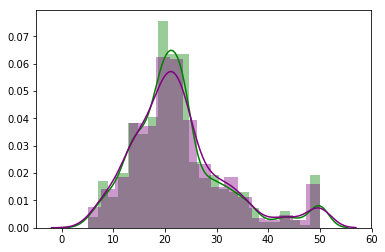

In [12]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

# Multiple Linear Regression

**Train the model using sklearn LinearRegression**

In [13]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
modelMLR = mlr.fit(xtrain, ytrain)

In [14]:
# calculate the coefficient values

b0 = modelMLR.intercept_
b = modelMLR.coef_

b1 = b[0][0]
b2 = b[0][1]
print("The value of intercept is %.3f"%b0)
print("The value of b1 is %.3f"%b1)
print("The value of b2 is %.3f"%b2)

The value of intercept is -0.243
The value of b1 is 4.982
The value of b2 is -0.662


In [15]:
predictMLR=modelMLR.predict(xtest)

In [16]:
ytest["PREDICTED"] = predictMLR

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
ytest["RESIDUAL"] = ytest.MEDV - ytest.PREDICTED

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
ytest.head()

,MEDV,PREDICTED,RESIDUAL
498,21.2,21.187407,0.012593
94,20.6,23.876763,-3.276763
150,21.5,20.918959,0.581041
221,21.7,16.252930,5.447070
423,13.4,14.736804,-1.336804


**Model Error calculation**

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MaeMLR = mean_absolute_error(ytest.MEDV,predictMLR)
print("The Mean absolute error of the model is %.4f"%MaeMLR)
MseMLR = mean_squared_error(ytest.MEDV,predictMLR)
print("The Mean squared error of the model is %.4f"%MseMLR)

The Mean absolute error of the model is 4.0952
The Mean squared error of the model is 26.7829


# Polynomial Regression

**Import the required Libraries**

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np

In [21]:
minMSE,minMAE,minValueDegree = 1e10,1e10,0
degrees = np.arange(1,20)

for degValue in degrees:
    # create a polynomial regression model for the given degree
    poly = PolynomialFeatures(degree = degValue)
    
    # transform the features to higher degree features.
    xTransform = poly.fit_transform(X)
    
    # fit the transformed features to Linear Regression
    model = LinearRegression()
    modelPoly = model.fit(xTransform,Y)
    
    # predict on training data-set
    predPoly=modelPoly.predict(poly.fit_transform(xtest))
    ytest["PREDICTED"] = predPoly
    ytest["RESIDUAL"] = ytest.MEDV - ytest.PREDICTED

    # evaluate the model on test dataset
    MsePoly = mean_squared_error(ytest.MEDV, ytest.PREDICTED)
    MaePoly = mean_absolute_error(ytest.MEDV, ytest.PREDICTED)
    
    # find the least value of MAE AND MSE along with the degree of the polynomial
    if minMSE > MsePoly:
        minMSE = MsePoly
        minValueDegree = degValue
    
    if minMAE >MaePoly:
        minMAE=MaePoly
        minValueDegree = degValue

# display of results
print("The best degree of the polynomial regression is %d"%minValueDegree)
print("At degree %d, The Mean absolute error is %.3f and Mean squared error is %.3f" %(minValueDegree,minMAE,minMSE))

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The best degree of the polynomial regression is 14
At degree 14, The Mean absolute error is 2.864 and Mean squared error is 15.414


**Observation : The Mean absolute error and Mean squared error of Polynomial Regression model is lower than the Multiple Linear Regression model for the same set of Predictors and samples(random_state is 20 in both the cases).**